# Image_Search_and_Recognition_CV,_Tesseract_OCR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pytesseract


In [ ]:
!sudo apt-get install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (27.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [ ]:
import zipfile
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
from google.colab import drive


In [ ]:
# Define the path to the zip files on Google Drive
small_img_path = '/content/drive/MyDrive/Colab Notebooks/Coursera Assignments/Py3_Final_Project/small_img.zip'
images_path = '/content/drive/MyDrive/Colab Notebooks/Coursera Assignments/Py3_Final_Project/images.zip'

# Extract the contents of the small_img.zip file
with zipfile.ZipFile(small_img_path, 'r') as archive:
    archive.extractall('/content/small_img')

# Extract the contents of the images.zip file
with zipfile.ZipFile(images_path, 'r') as archive:
    archive.extractall('/content/images')


In [ ]:
# Define the path to the zip files on Google Drive
small_img_path = '/content/drive/MyDrive/Colab Notebooks/Coursera Assignments/Py3_Final_Project/small_img.zip'
images_path = '/content/drive/MyDrive/Colab Notebooks/Coursera Assignments/Py3_Final_Project/images.zip'

# Extract the contents of the small_img.zip file
with zipfile.ZipFile(small_img_path, 'r') as archive:
    archive.extractall('/content/small_img')

# Extract the contents of the images.zip file
with zipfile.ZipFile(images_path, 'r') as archive:
    archive.extractall('/content/images')


In [ ]:
# Load the face detection classifier
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [ ]:
# Function to perform OCR on an image
def ocr_image(image_path):
    img = Image.open(image_path)
    text = pytesseract.image_to_string(img)
    return text


In [ ]:
# Function to detect faces in an image
def detect_faces(image_path):
    img = cv.imread(image_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    return faces


In [ ]:
# Function to create a contact sheet of faces
def create_contact_sheet(image_path, faces):
    img = Image.open(image_path)
    contact_sheet = Image.new('RGB', (500, 100 * (len(faces) // 5 + 1)))
    x, y = 0, 0

    for (x_, y_, w, h) in faces:
        face = img.crop((x_, y_, x_ + w, y_ + h)).resize((100, 100))
        contact_sheet.paste(face, (x, y))

        x += 100
        if x == 500:
            x, y = 0, y + 100

    return contact_sheet


In [ ]:
import os

# Function to search for a keyword in images and create contact sheets
def search_and_create_contact_sheets(keyword, folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            image_path = os.path.join(root, file)

            # Perform OCR on the image
            text = ocr_image(image_path)

            # Search for the keyword in the OCR text
            if keyword.lower() in text.lower():
                print(f'Keyword "{keyword}" found in {file}')

                # Detect faces in the image
                faces = detect_faces(image_path)

                # Create a contact sheet of faces
                contact_sheet = create_contact_sheet(image_path, faces)
                display(contact_sheet)


Keyword "Christopher" found in a-3.png


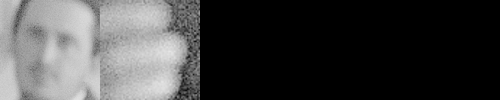

Keyword "Christopher" found in a-0.png


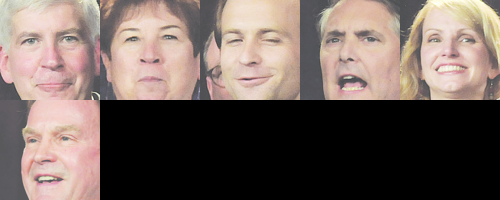

Keyword "Mark" found in a-8.png


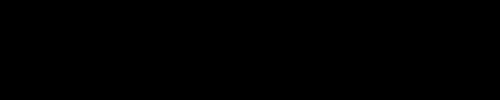

Keyword "Mark" found in a-3.png


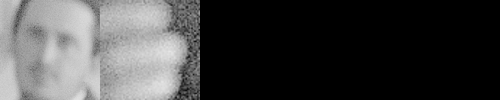

Keyword "Mark" found in a-9.png


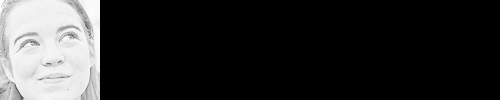

Keyword "Mark" found in a-5.png


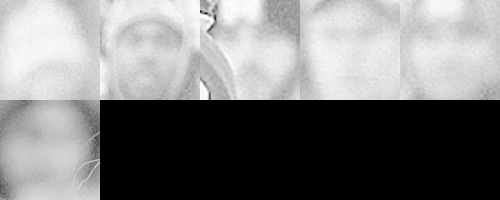

Keyword "Mark" found in a-0.png


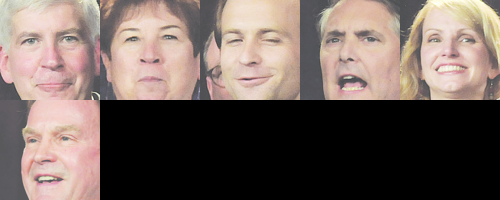

Keyword "Mark" found in a-10.png


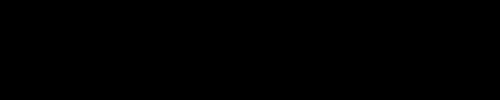

Keyword "Mark" found in a-13.png


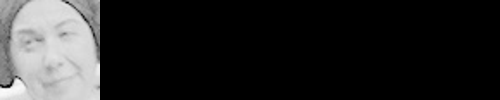

Keyword "Mark" found in a-1.png


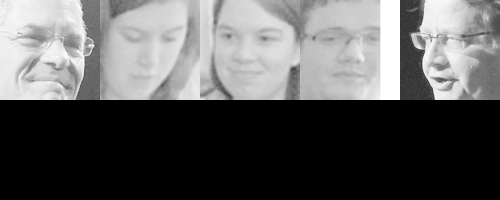

Keyword "Mark" found in a-2.png


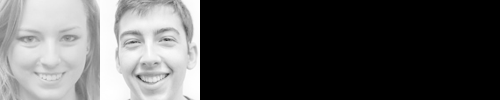

In [ ]:
# Search for the keyword "Christopher" in small_img folder
search_and_create_contact_sheets('Christopher', '/content/small_img')

# Search for the keyword "Mark" in images folder
search_and_create_contact_sheets('Mark', '/content/images')
